In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [1]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/DS Data Sets/Decision Trees/Fraud_check.csv')

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
df.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [10]:
df.columns
df.shape

(600, 7)

In [14]:
list_lenght=len(['Undergrad','Marital.Status','Urban','Taxable.Income','City.Population','Work.Experience'])

In [15]:
print(f"Lenght of list: {list_lenght}")

Lenght of list: 6


In [17]:
df["TaxInc"]=pd.cut(df["Taxable.Income"],bins=[10002,30000,99620],labels=["Risky","Good"])

In [21]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  TaxInc_Good  
0                         0                      1        

In [35]:
# Normalization
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [37]:
df_norm= norm_func(df.iloc[:,1:])
df_norm.head(10)

,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good,Taxable.Income_10150,Taxable.Income_10163,Taxable.Income_10329,Taxable.Income_10348,...,Taxable.Income_98738,Taxable.Income_98933,Taxable.Income_98970,Taxable.Income_99109,Taxable.Income_99128,Taxable.Income_99239,Taxable.Income_99307,Taxable.Income_99311,Taxable.Income_99325,Taxable.Income_99619
0,0.333333,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.600000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.933333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.266667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.100000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.400000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.133333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
x=df_norm.drop(['TaxInc_Good'],axis=1)

In [39]:
y=df_norm['TaxInc_Good']

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [45]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
  if df[column_name].dtype==object:
    df[column_name]=le.fit_transform(df[column_name])
  else:
    pass

In [46]:
# split data into features and labels
features=df.iloc[:,0:5]
labels=df.iloc[:,5]

In [48]:
# collecting column names
colnames=list(df.columns)
predictors=colnames[0:5]
target=colnames[5]

In [49]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=0)


In [50]:
# Model building
from sklearn.ensemble import RandomForestClassifier as RF
model=RF(n_jobs=3,n_estimators=15,oob_score=True,criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [51]:
model.n_outputs_

1

In [52]:
model.oob_score_

0.54375

In [53]:
prediction=model.predict(x_train)

In [54]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [55]:
np.mean(prediction==y_train)

0.99375

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_train,prediction)

In [58]:
pred_test=model.predict(x_test)
acc_test=accuracy_score(y_test,pred_test)

In [59]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO


In [70]:
tree=model
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,filled=True,rounded=True,feature_names=predictors,class_names=['1','0'])

In [61]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [62]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
from sklearn import tree

In [65]:
df.columns


Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES',
       'TaxInc_Good', 'Taxable.Income_10150', 'Taxable.Income_10163',
       'Taxable.Income_10329',
       ...
       'Taxable.Income_98738', 'Taxable.Income_98933', 'Taxable.Income_98970',
       'Taxable.Income_99109', 'Taxable.Income_99128', 'Taxable.Income_99239',
       'Taxable.Income_99307', 'Taxable.Income_99311', 'Taxable.Income_99325',
       'Taxable.Income_99619'],
      dtype='object', length=605)

In [72]:
from sklearn.tree import plot_tree

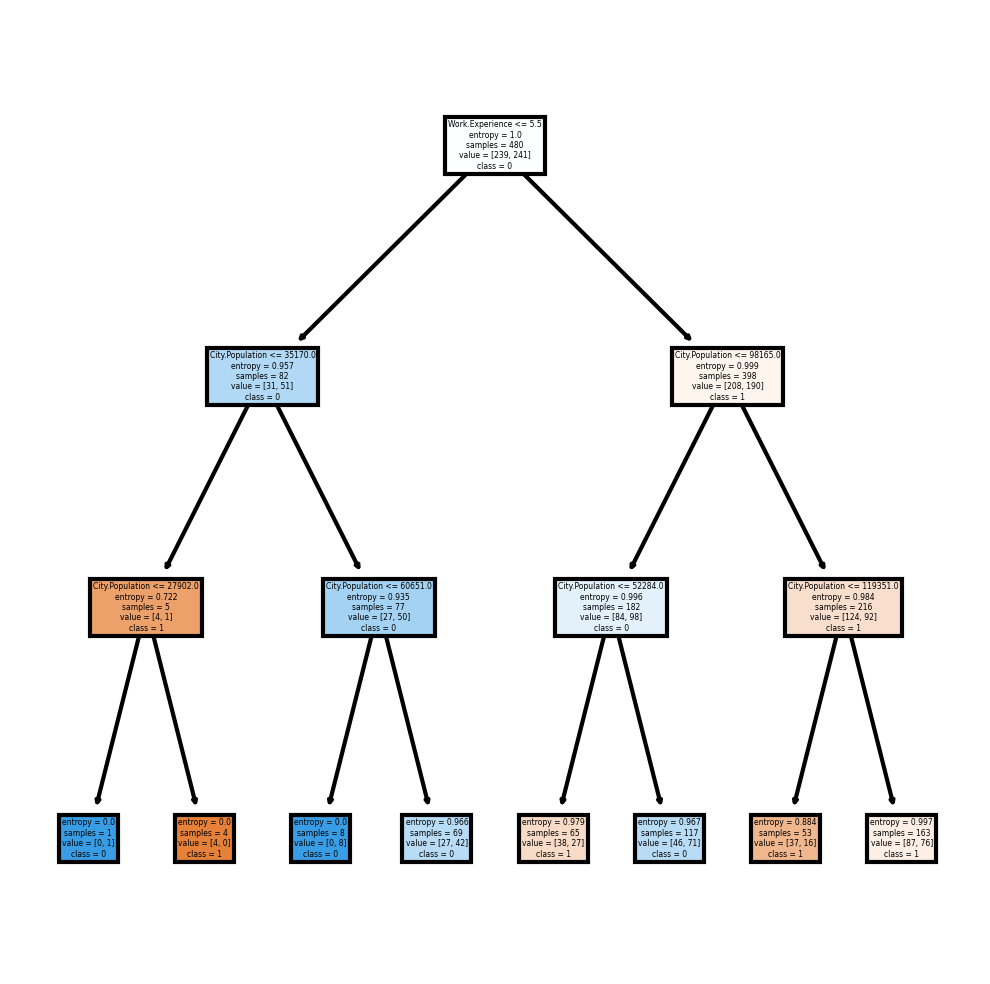

In [74]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married',
    'Marital.Status_Single','Urban_YES']
cn=['1','0']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);


In [75]:
# Predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    80
1    40
dtype: int64

In [76]:
preds

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [77]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,41,18
1,39,22


In [78]:
# Accuracy
np.mean(preds==y_test)

0.525